# Task: Credit of Germany

## Intorduction

### Task Description

>The purpose of this task is to analyze the characteristics of credit-germany dataset and to create a model that aid banks and other financial institutions in taking a decision whether or not to grant credit to a specific person.

### Dataset Description

>The provided dataset is provided by Dr. Hans Hofmann about people who asks for credit and whether it's good or not to grant the credit. The dataset consisted of a target along with 20 different attributes which are:
- Attribute 1: Status of existing Checking account
- Attribute 2: Duration in month
- Attribute 3: Credit history
- Attribute 4: Purpose
- Attribute 5: Credit amount
- Attribute 6: Savings account/bonds
- Attribute 7: Present employment since
- Attribute 8: Installment rate in percentage of disposable income
- Attribute 9: Personal status and sex
- Attribute 10: Other debtors / guarantors
- Attribute 11: Present residence since
- Attribute 12: Property
- Attribute 13: Age in years
- Attribute 14: Other installment plans
- Attribute 15: Housing
- Attribute 16: Number of existing credits at this bank
- Attribute 17: Job
- Attribute 18: Number of people being liable to provide maintenance for
- Attribute 19: Telephone
- Attribute 20: Foreign worker


In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

## Data Exploration

In [2]:
#Loading Data

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', header = None, delimiter=' ')
df.columns = ['acc_status', 'duration','credit_hist', 'purpose', 'amount', 'savings_acc','employed_since', 'install_rate', 'maritial_gender', 'guarantors', 'residence_since', 'property','age','other_install_plans', 'housing', 'other_credits', 'job', 'liable_people_count','telephone','foreign_worker','target']
df.head(5)

,acc_status,duration,credit_hist,purpose,amount,savings_acc,employed_since,install_rate,maritial_gender,guarantors,...,property,age,other_install_plans,housing,other_credits,job,liable_people_count,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


>The raw data did not contain names for the attributes so columns with describtive naming was added to ease data interpretation 

In [3]:
#Datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   acc_status           1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_hist          1000 non-null   object
 3   purpose              1000 non-null   object
 4   amount               1000 non-null   int64 
 5   savings_acc          1000 non-null   object
 6   employed_since       1000 non-null   object
 7   install_rate         1000 non-null   int64 
 8   maritial_gender      1000 non-null   object
 9   guarantors           1000 non-null   object
 10  residence_since      1000 non-null   int64 
 11  property             1000 non-null   object
 12  age                  1000 non-null   int64 
 13  other_install_plans  1000 non-null   object
 14  housing              1000 non-null   object
 15  other_credits        1000 non-null   int64 
 16  job    

In [4]:
#Distributions of numerical data
df.describe()

,duration,amount,install_rate,residence_since,age,other_credits,liable_people_count,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
#Check for null values in features
df.isnull().any()

acc_status             False
duration               False
credit_hist            False
purpose                False
amount                 False
savings_acc            False
employed_since         False
install_rate           False
maritial_gender        False
guarantors             False
residence_since        False
property               False
age                    False
other_install_plans    False
housing                False
other_credits          False
job                    False
liable_people_count    False
telephone              False
foreign_worker         False
target                 False
dtype: bool

In [6]:
#Check if thedata has duplicated rows
df.duplicated().sum()

0

In [7]:
#The number 
df.nunique()

acc_status               4
duration                33
credit_hist              5
purpose                 10
amount                 921
savings_acc              5
employed_since           5
install_rate             4
maritial_gender          4
guarantors               3
residence_since          4
property                 4
age                     53
other_install_plans      3
housing                  3
other_credits            4
job                      4
liable_people_count      2
telephone                2
foreign_worker           2
target                   2
dtype: int64

In [8]:
df.shape

(1000, 21)

Observations:
- The Dataset does not contain any null values
- There is no duplicated rows
- The range of values of the numerical features are very different from each others


## Data Visualization

In [9]:
df.target.value_counts()

1    700
2    300
Name: target, dtype: int64

In [10]:
target_stri = df.target.replace([1,2], ['good','bad'])
target_stri.value_counts()

good    700
bad     300
Name: target, dtype: int64

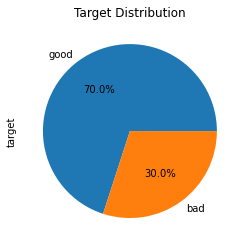

In [11]:
target_stri.value_counts().plot.pie( title = 'Target Distribution',autopct='%1.1f%%');

>The target of the dataset consists of 700 person that are got fit to get credit. The other 300 is known to be risky to give them credit.

In [12]:
good = df['target'] == 1
bad = df['target'] == 2

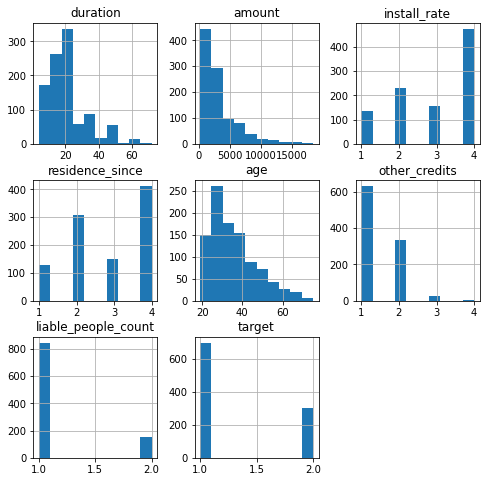

In [13]:
df.hist(figsize = (8,8));

>When plotting the histograms of the numerical values, install_rate, residence_scince, other_credits, liable_people_count and target attributes seemed to be illogical to be considered as numerical values. When the dataset was investigated further, a research paper sugested that these attributes are catigorical features and these values are representing categories. So the data type of theses attributes needs changing.

>Reference: http://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf

### Change Data Types

In [14]:
df.target = df.target.astype('category')


In [15]:
df.liable_people_count = df.liable_people_count.astype('category')

In [16]:
df.install_rate = df.install_rate.astype('category')


In [17]:
df.residence_since = df.residence_since.astype('category')


In [18]:
df.other_credits = df.other_credits.astype('category')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   acc_status           1000 non-null   object  
 1   duration             1000 non-null   int64   
 2   credit_hist          1000 non-null   object  
 3   purpose              1000 non-null   object  
 4   amount               1000 non-null   int64   
 5   savings_acc          1000 non-null   object  
 6   employed_since       1000 non-null   object  
 7   install_rate         1000 non-null   category
 8   maritial_gender      1000 non-null   object  
 9   guarantors           1000 non-null   object  
 10  residence_since      1000 non-null   category
 11  property             1000 non-null   object  
 12  age                  1000 non-null   int64   
 13  other_install_plans  1000 non-null   object  
 14  housing              1000 non-null   object  
 15  other_credits        1

In [20]:
df.head(5)

,acc_status,duration,credit_hist,purpose,amount,savings_acc,employed_since,install_rate,maritial_gender,guarantors,...,property,age,other_install_plans,housing,other_credits,job,liable_people_count,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Numerical Data Visualization with the Target

In [21]:
#Visualization function
def histo_relation (col_name, kind, title, xlab, ylab, ):
    df[col_name][good].value_counts().sort_index().plot(kind = kind, label = 'Good', color = 'orange', figsize = (10,6), legend = True)
    df[col_name][bad].value_counts().sort_index().plot(kind = kind, label = 'Bad', color = 'blue', figsize = (10,6),legend = True)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab);

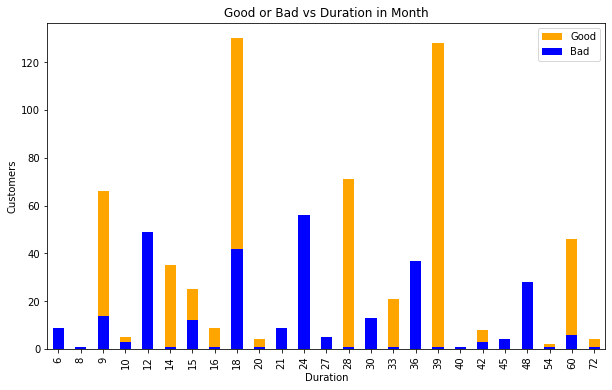

In [22]:
histo_relation ('duration', 'bar', 'Good or Bad vs Duration in Month', 'Duration', 'Customers')

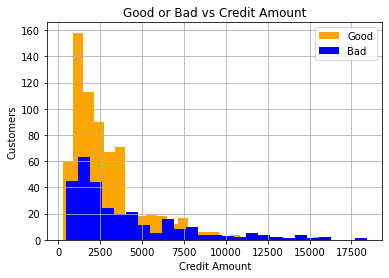

In [23]:
df['amount'][good].hist(bins =25, label = 'Good', color = 'orange')
df['amount'][bad].hist( bins =25, label = 'Bad', color = 'blue')
plt.legend()
plt.title('Good or Bad vs Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Customers');

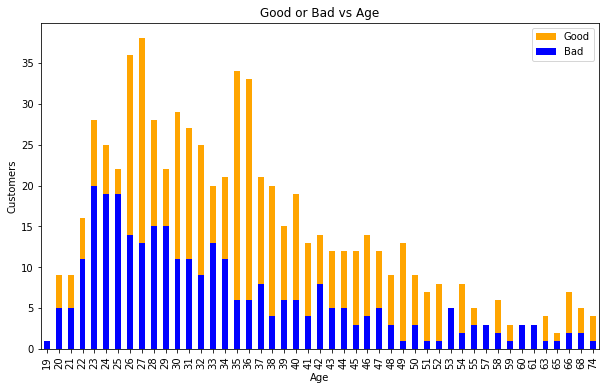

In [24]:
histo_relation ('age', 'bar', 'Good or Bad vs Age', 'Age', 'Customers')

Observations:
- The amount graph shows that as the amount of the credit increases, it's a rik to grant this person the credit. It's also observed that most people ask to be granted credit between 0 and 5000.
- In the age grapgh, we can see that people between age 35-52 has a higher chance to be granted the credit this might because they have a stable job

In [25]:
#Correlation between numerical data
df_cont = df[['duration','amount','age']]
df_cont.head(1)

,duration,amount,age
0,6,1169,67


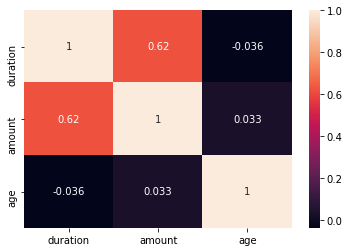

In [26]:
sns.heatmap(df_cont.corr(), annot=True)
plt.show()

>The correlation between numerical data shows that only the amount and duration is somehow correlated but not very strong correlation

### Visualization of Categorical Features with the Target

install_rate: Installment rate in percentage of disposable income
- 1: >= 35 
- 2: 25 <= ... < 35
- 3: 20 <= ... < 25
- 4: < 20 

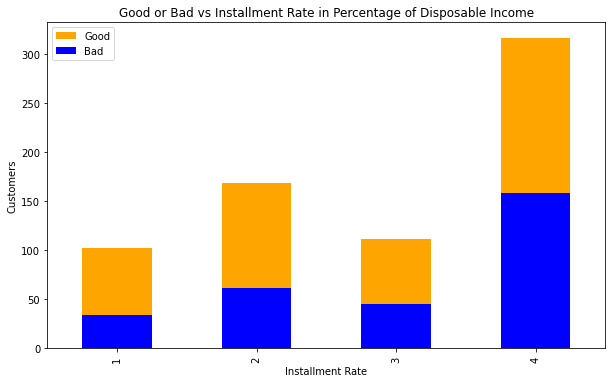

In [27]:
histo_relation ('install_rate', 'bar', 'Good or Bad vs Installment Rate in Percentage of Disposable Income', 'Installment Rate', 'Customers')

residence_since: Present residence since
- 1: < 1 yr 
- 2: 1 <= ... < 4 yrs 
- 3: 4 <= ... < 7 yrs 
- 4: >= 7 yrs 4

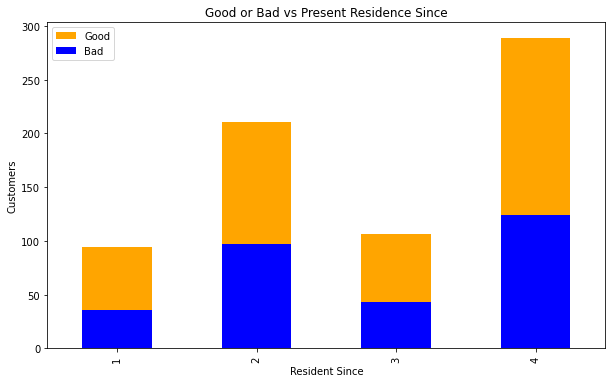

In [28]:
histo_relation ('residence_since', 'bar', 'Good or Bad vs Present Residence Since', 'Resident Since', 'Customers')

other_credits: Number of existing credits at this bank
- 1: 1 
- 2: 2-3 
- 3: 4-5 
- 4: >= 6 

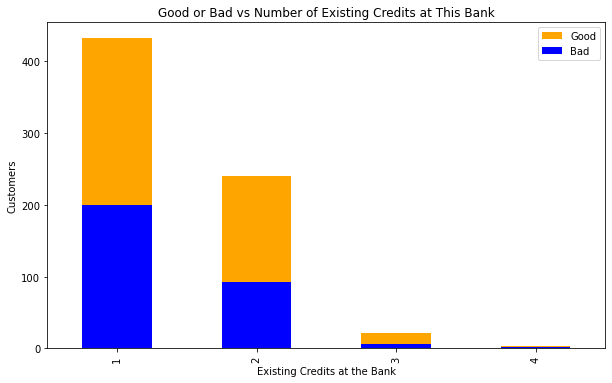

In [29]:
histo_relation ('other_credits', 'bar', 'Good or Bad vs Number of Existing Credits at This Bank', 'Existing Credits at the Bank', 'Customers')

liable_people_count: Number of people being liable to provide maintenance for
- 1: 3 or more 
- 2: 0 to 2 

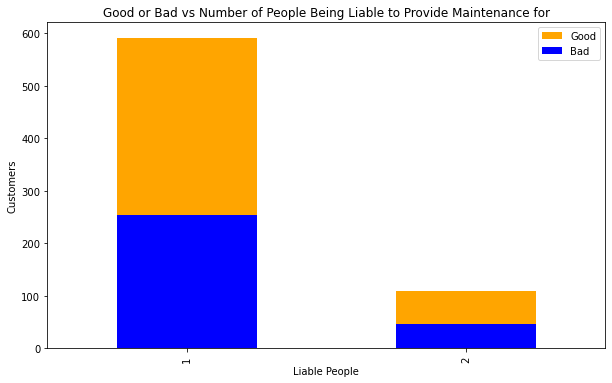

In [30]:
histo_relation ('liable_people_count', 'bar', 'Good or Bad vs Number of People Being Liable to Provide Maintenance for', 'Liable People', 'Customers')

In [31]:
df.select_dtypes(include=['object']).columns

Index(['acc_status', 'credit_hist', 'purpose', 'savings_acc', 'employed_since',
       'maritial_gender', 'guarantors', 'property', 'other_install_plans',
       'housing', 'job', 'telephone', 'foreign_worker'],
      dtype='object')

acc_status: Status of existing checking account
- A11 :      ... <    0 DM
- A12 : 0 <= ... <  200 DM
- A13 :      ... >= 200 DM /salary assignments for at least 1 year
- A14 : no checking account


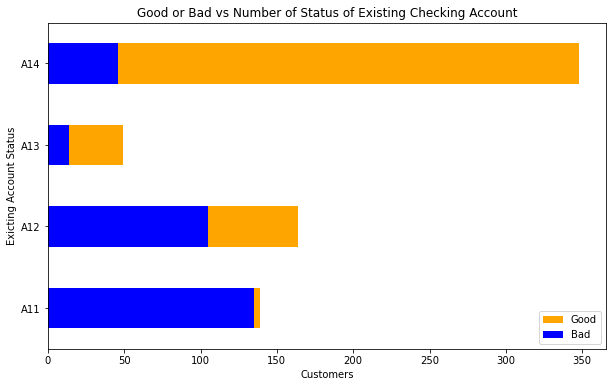

In [32]:
histo_relation ('acc_status', 'barh', 'Good or Bad vs Number of Status of Existing Checking Account', 'Customers', 'Exicting Account Status')

credit_hist: Credit history
- A30 : no credits taken/all credits paid back duly
- A31 : all credits at this bank paid back duly
- A32 : existing credits paid back duly till now
- A33 : delay in paying off in the past
- A34 : critical account/other credits existing (not at this bank)


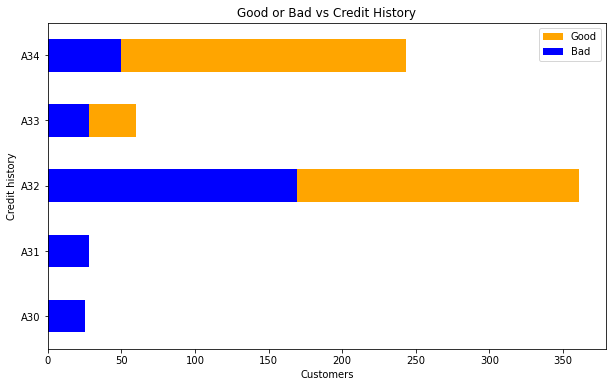

In [33]:
histo_relation ('credit_hist', 'barh', 'Good or Bad vs Credit History', 'Customers', 'Credit history')

Purpose
- A40 : car (new)
- A41 : car (used)
- A42 : furniture/equipment
- A43 : radio/television
- A44 : domestic appliances
- A45 : repairs
- A46 : education
- A47 : (vacation - does not exist?)
- A48 : retraining
- A49 : business
- A410 : others


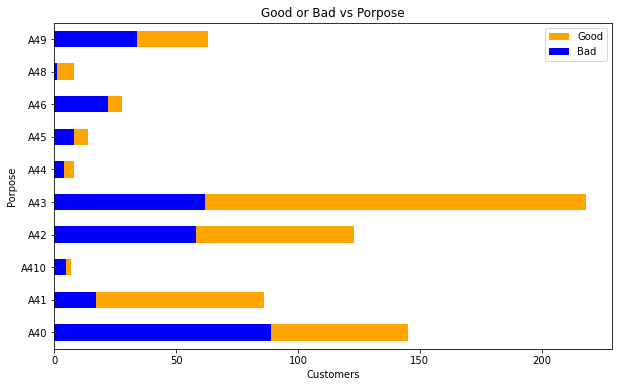

In [34]:
histo_relation ('purpose', 'barh', 'Good or Bad vs Porpose', 'Customers', 'Porpose')

savings_acc: Savings account/bonds
- A61 :          ... <  100 DM
- A62 :   100 <= ... <  500 DM
- A63 :   500 <= ... < 1000 DM
- A64 :          .. >= 1000 DM
- A65 :   unknown/ no savings account


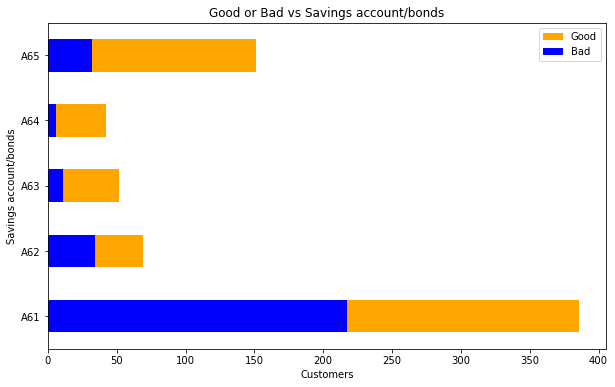

In [35]:
histo_relation ('savings_acc', 'barh', 'Good or Bad vs Savings account/bonds', 'Customers', 'Savings account/bonds')

employed_since: Present employment since
- A71 : unemployed
- A72 :       ... < 1 year
- A73 : 1  <= ... < 4 years  
- A74 : 4  <= ... < 7 years
- A75 :       .. >= 7 years


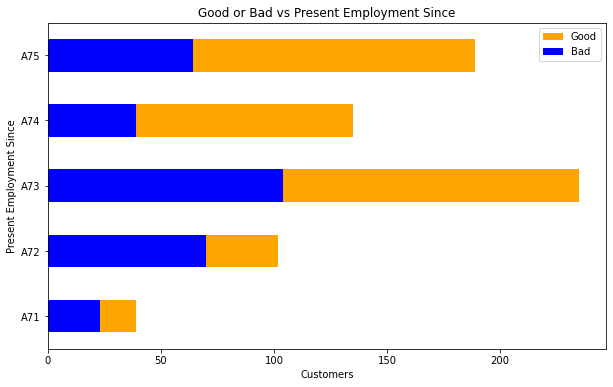

In [36]:
histo_relation ('employed_since', 'barh', 'Good or Bad vs Present Employment Since', 'Customers', 'Present Employment Since')

maritial_gender: Personal status and sex
- A91 : male   : divorced/separated
- A92 : female : divorced/separated/married
- A93 : male   : single
- A94 : male   : married/widowed
- A95 : female : single


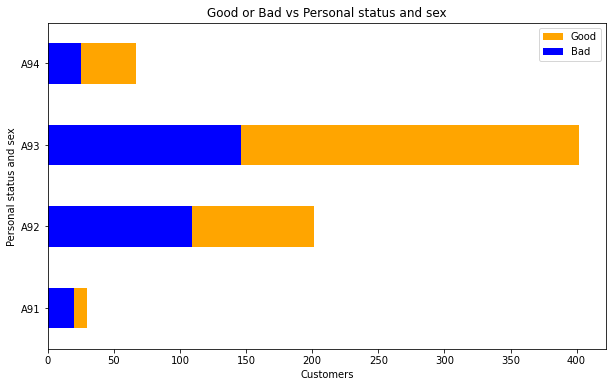

In [37]:
histo_relation ('maritial_gender', 'barh', 'Good or Bad vs Personal status and sex', 'Customers', 'Personal status and sex')

Other debtors / guarantors
- A101 : none
- A102 : co-applicant
- A103 : guarantor


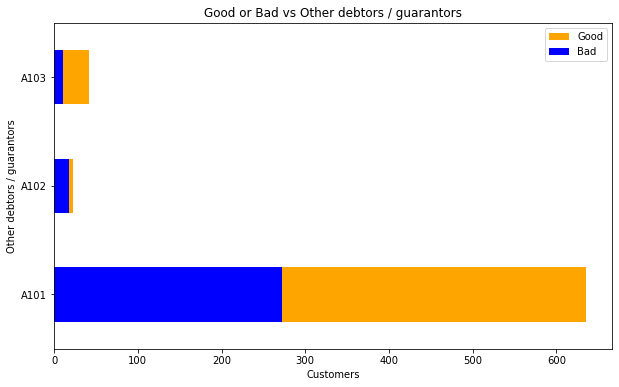

In [38]:
histo_relation ('guarantors', 'barh', 'Good or Bad vs Other debtors / guarantors', 'Customers', 'Other debtors / guarantors')

Property
- A121 : real estate
- A122 : if not A121 : building society savings agreement/life insurance
- A123 : if not A121/A122 : car or other, not in attribute 6
- A124 : unknown / no property


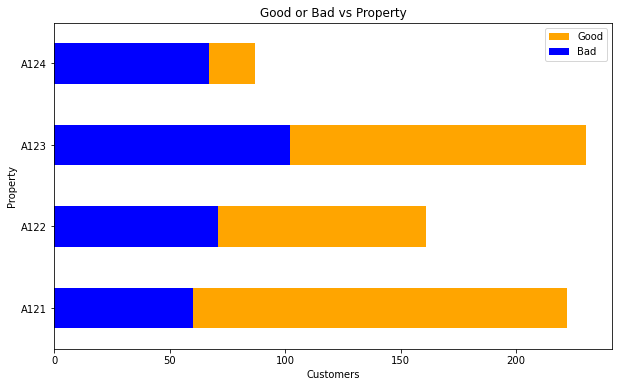

In [39]:
histo_relation ('property', 'barh', 'Good or Bad vs Property', 'Customers', 'Property')

other_install_plans: Other installment plans 
- A141 : bank
- A142 : stores
- A143 : none


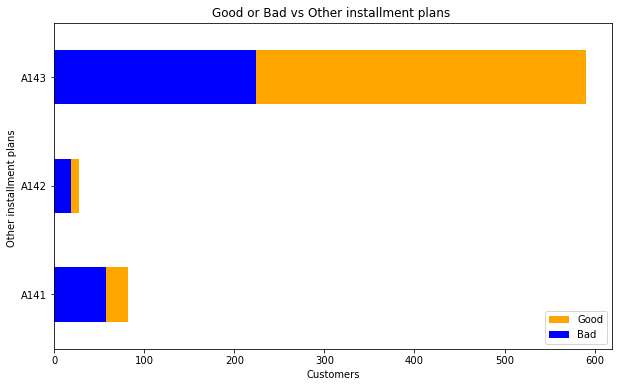

In [40]:
histo_relation ('other_install_plans', 'barh', 'Good or Bad vs Other installment plans ', 'Customers', 'Other installment plans ')

Housing
- A151 : rent
- A152 : own
- A153 : for free


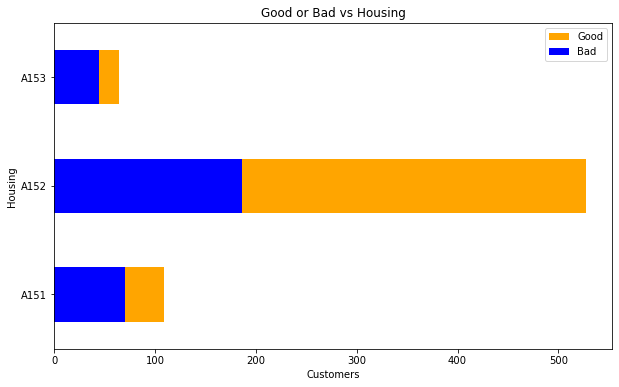

In [41]:
histo_relation ('housing', 'barh', 'Good or Bad vs Housing', 'Customers', 'Housing')

Job
- A171 : unemployed/ unskilled  - non-resident
- A172 : unskilled - resident
- A173 : skilled employee / official
- A174 : management/ self-employed/highly qualified employee/ officer


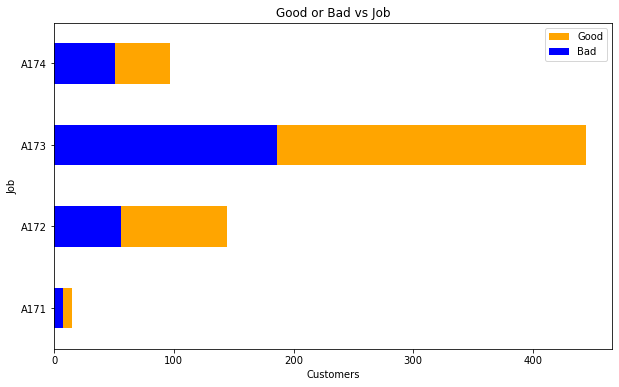

In [42]:
histo_relation ('job', 'barh', 'Good or Bad vs Job', 'Customers', 'Job')

Telephone
- A191 : none
- A192 : yes, registered under the customers name


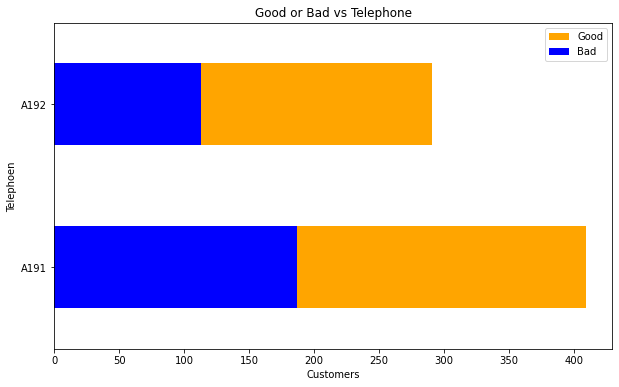

In [43]:
histo_relation ('telephone', 'barh', 'Good or Bad vs Telephone', 'Customers', 'Telephoen')

foreign_worker: Foreign worker
- A201 : yes
- A202 : no



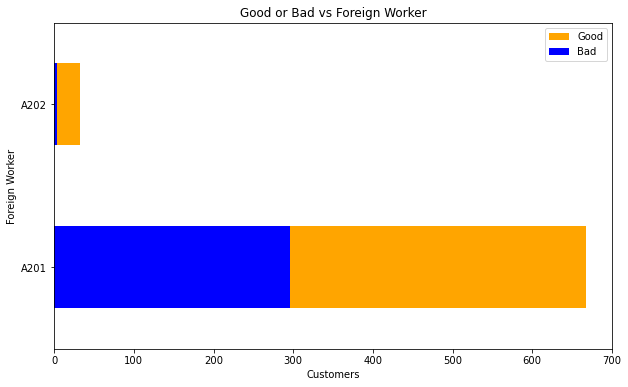

In [44]:
histo_relation ('foreign_worker', 'barh', 'Good or Bad vs Foreign Worker', 'Customers', 'Foreign Worker')

Observations:
- It is observed that a large portion of people tend to choose installment rate with low percentage of their income. 
- Most people that require a credit has already from 1-3 credits at this bank
- People with no checking accounts has a higher chance to be granted the credit
- An interesting observation that people whose credit history is critical or in other banks have high chance to be granted the credit
- People that want the credit for either radi/tlevision or used car have higher chance to be granted the credit
- An interesting observation is that people that have no savings account have higher chance to be granted the credit
- People that stayed in their current job for a year or more have a higher chance to get the credit than unemployed and recently employed people
- Single men are the largest portion that request a credit and they have high chance to get it
- People that apply alone to get the credit represent the largest portion of the data.
- People that have a real state have higher chance to get the credit
- People that have no other installment plans are the largest portion and have a good chance to be granted the credit
- People that own their house have a higher chance to get the credit
- Most of the people applying to get the credit are foreign worker

## Data Preprocessing

### Categorical Features Encoding
>In order for the models to be able to work with categorical features, the features need to be encoded. One-hot-encoding is used to encode al the catigorical features.

In [45]:
df.columns

Index(['acc_status', 'duration', 'credit_hist', 'purpose', 'amount',
       'savings_acc', 'employed_since', 'install_rate', 'maritial_gender',
       'guarantors', 'residence_since', 'property', 'age',
       'other_install_plans', 'housing', 'other_credits', 'job',
       'liable_people_count', 'telephone', 'foreign_worker', 'target'],
      dtype='object')

In [46]:
#Each new feature's name is the main feature name and the category
cat_columns = ['acc_status', 'credit_hist', 'purpose', 
       'savings_acc', 'employed_since', 'install_rate', 'maritial_gender',
       'guarantors', 'residence_since', 'property', 
       'other_install_plans', 'housing', 'other_credits', 'job',
       'liable_people_count', 'telephone', 'foreign_worker']
for i in cat_columns:
    x = pd.get_dummies(df[i], prefix= i)
    df.drop([i], axis =1, inplace = True)
    df = pd.merge(df,x, left_index=True, right_index = True)

df.head(1)
    

,duration,amount,age,target,acc_status_A11,acc_status_A12,acc_status_A13,acc_status_A14,credit_hist_A30,credit_hist_A31,...,job_A171,job_A172,job_A173,job_A174,liable_people_count_1,liable_people_count_2,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,67,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   duration                  1000 non-null   int64   
 1   amount                    1000 non-null   int64   
 2   age                       1000 non-null   int64   
 3   target                    1000 non-null   category
 4   acc_status_A11            1000 non-null   uint8   
 5   acc_status_A12            1000 non-null   uint8   
 6   acc_status_A13            1000 non-null   uint8   
 7   acc_status_A14            1000 non-null   uint8   
 8   credit_hist_A30           1000 non-null   uint8   
 9   credit_hist_A31           1000 non-null   uint8   
 10  credit_hist_A32           1000 non-null   uint8   
 11  credit_hist_A33           1000 non-null   uint8   
 12  credit_hist_A34           1000 non-null   uint8   
 13  purpose_A40               1000 non-null   uint8  

### Feature Normalization
>Some algorithms needs the numerical features to be normalized in order to get accurate results as KNN and logistic regression. Min-Max scaler is used to rescale all the numerical features to be between 0-1.

In [48]:
df.head(1)

,duration,amount,age,target,acc_status_A11,acc_status_A12,acc_status_A13,acc_status_A14,credit_hist_A30,credit_hist_A31,...,job_A171,job_A172,job_A173,job_A174,liable_people_count_1,liable_people_count_2,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,67,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


In [49]:
scaler = MinMaxScaler()
df[['duration', 'amount', 'age']] = scaler.fit_transform(df[['duration', 'amount', 'age']])
df[['duration', 'amount', 'age']].describe()

,duration,amount,age
count,1000.000000,1000.000000,1000.000000
mean,0.248574,0.166241,0.295464
std,0.177336,0.155317,0.203133
min,0.000000,0.000000,0.000000
25%,0.117647,0.061379,0.142857
50%,0.205882,0.113871,0.250000
75%,0.294118,0.204812,0.410714
max,1.000000,1.000000,1.000000


# Model Training without Feature Selection and Parameter Tunning
>In order to know the effect of feature selection and parameter tuning on the models, a training was made on the dataset with different classifiers. The dataset is splited into 80% for training and 20% for testing. The following models were used:
>- XGBoost
>- Random Forest
>- Logistic Regression
>- Naive Bays
>- K-Nearst Neighbors
>- Decision Tree

>ROC-AUC score were used as the metric for the models

In [50]:
#train-test split
Y = df.target
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [51]:
#xgboost
model = XGBClassifier()
model.fit(X_train, y_train)
xgb_y_pred = model.predict_proba(X_test)
xgb_y_pred1 = model.predict(X_test)


[16:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
roc_auc_score(y_test,xgb_y_pred[:,1])

0.7690716911764706

In [53]:
#Confusion Matrix to show the values of TP, TN, FP, and FN
matrix = confusion_matrix(y_test, xgb_y_pred1)
matrix

array([[114,  22],
       [ 31,  33]], dtype=int64)

In [54]:
#Random Forest Model
model = RandomForestClassifier()
model.fit(X_train, y_train)
rfc_y_pred = model.predict_proba(X_test)
rfc_y_pred1 = model.predict(X_test)


In [55]:
roc_auc_score(y_test,rfc_y_pred[:,1])

0.8061810661764706

In [56]:
matrix = confusion_matrix(y_test, rfc_y_pred1)
matrix

array([[123,  13],
       [ 37,  27]], dtype=int64)

In [57]:
#Logistic Regression
model =LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)
logreg_y_pred = model.predict_proba(X_test)
logreg_y_pred1 = model.predict(X_test)


In [58]:
roc_auc_score(y_test, logreg_y_pred[:,1])

0.787454044117647

In [59]:
matrix = confusion_matrix(y_test, logreg_y_pred1)
matrix

array([[120,  16],
       [ 29,  35]], dtype=int64)

In [60]:
#Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
nb_y_pred = model.predict_proba(X_test)
nb_y_pred1 = model.predict(X_test)


In [61]:
roc_auc_score(y_test, nb_y_pred[:,1])

0.76171875

In [62]:
matrix = confusion_matrix(y_test, nb_y_pred1)
matrix

array([[104,  32],
       [ 23,  41]], dtype=int64)

In [63]:
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
knn_y_pred = model.predict_proba(X_test)
knn_y_pred1 = model.predict(X_test)


In [64]:
roc_auc_score(y_test, knn_y_pred[:,1])

0.6928998161764706

In [65]:
matrix = confusion_matrix(y_test, knn_y_pred1)
matrix

array([[112,  24],
       [ 37,  27]], dtype=int64)

In [66]:
#Decision Tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_y_pred = model.predict_proba(X_test)
dt_y_pred1 = model.predict(X_test)


In [67]:
roc_auc_score(y_test, dt_y_pred[:,1])

0.6029411764705881

In [68]:
matrix = confusion_matrix(y_test, dt_y_pred1)
matrix

array([[96, 40],
       [32, 32]], dtype=int64)

Observations:
- Random forest model yeilds the best score. Decision tree, however, provided the lowest score.
- According to the cost matrix provided with the dataset, the false positive cost 5 times as a false negative so false positive is important in this case study. Random forest show the lowest count of false positives among all models while decision tree scored the highest count of false positive

# Feature selection

>In order to reduce the computation time for the model and focuss more on important features, feature selection is used. Two methods were used to reduce the features which are chi squared to remove the most irrelelvant features catigorical followed XGBoost feature importance method to choose the most important features for the model

In [69]:
X.shape

(1000, 71)

In [70]:
cat_x_features = X.drop(['amount', 'duration', 'age'], axis = 1)

In [71]:
#feature selection using chi squared
chi2_features = SelectKBest(chi2, k = 'all')

X_kbest_features = chi2_features.fit_transform(cat_x_features, Y)
chi2_features.scores_

array([4.84504692e+01, 1.04530005e+01, 1.81481481e+00, 6.30026589e+01,
       2.01190476e+01, 1.71904762e+01, 8.98472597e-01, 1.38528139e-01,
       2.33448724e+01, 7.19251119e+00, 8.93250116e+00, 7.77777778e-01,
       3.60168377e-01, 8.23129252e+00, 6.34920635e-02, 4.24242424e-01,
       4.66666667e+00, 1.52910053e+00, 1.17869416e+00, 1.02914791e+01,
       4.44290337e-01, 4.71730915e+00, 7.00000000e+00, 1.36458496e+01,
       1.48694316e+00, 9.37320044e+00, 7.43081894e-02, 4.76847291e+00,
       2.66534914e+00, 1.61904762e+00, 1.09853638e+00, 1.33757962e-01,
       2.62545018e+00, 2.38095238e+00, 3.93241167e+00, 2.94195342e+00,
       3.49896480e-01, 5.25017063e-05, 3.77351916e+00, 2.87179487e+00,
       3.29670330e-01, 3.27149041e-01, 9.23617769e-02, 1.15300357e-04,
       1.02188450e+01, 4.02298851e-02, 8.26161790e-02, 1.33778602e+01,
       8.01952724e+00, 2.43262411e+00, 2.38703639e+00, 7.06810322e+00,
       5.19875776e+00, 5.93298060e+00, 7.67396374e-01, 8.92463892e-01,
      

In [72]:
X_kbest_features.shape

(1000, 68)

In [73]:
feature_to_score = {}
for i in range(len(chi2_features.scores_)):
    feature_to_score[cat_x_features.columns[i]] = chi2_features.scores_[i]
features = [k for k, v in sorted(feature_to_score.items(), key = lambda x: x[1], reverse = True)]
features

['acc_status_A14',
 'acc_status_A11',
 'credit_hist_A34',
 'credit_hist_A30',
 'credit_hist_A31',
 'savings_acc_A65',
 'property_A124',
 'acc_status_A12',
 'savings_acc_A61',
 'property_A121',
 'employed_since_A72',
 'purpose_A41',
 'purpose_A43',
 'other_install_plans_A141',
 'purpose_A40',
 'housing_A151',
 'savings_acc_A64',
 'foreign_worker_A202',
 'housing_A153',
 'housing_A152',
 'employed_since_A74',
 'savings_acc_A63',
 'purpose_A46',
 'maritial_gender_A92',
 'guarantors_A102',
 'maritial_gender_A93',
 'guarantors_A103',
 'employed_since_A75',
 'install_rate_4',
 'other_install_plans_A142',
 'other_install_plans_A143',
 'maritial_gender_A91',
 'acc_status_A13',
 'install_rate_1',
 'purpose_A48',
 'employed_since_A71',
 'job_A174',
 'purpose_A49',
 'install_rate_2',
 'other_credits_3',
 'credit_hist_A32',
 'other_credits_2',
 'telephone_A192',
 'purpose_A410',
 'other_credits_1',
 'telephone_A191',
 'savings_acc_A62',
 'purpose_A45',
 'job_A172',
 'purpose_A42',
 'maritial_gende

In [74]:
sorted_values = sorted(feature_to_score.items(), key = lambda x: x[1], reverse = True)
sorted_values

[('acc_status_A14', 63.00265893159296),
 ('acc_status_A11', 48.4504692387904),
 ('credit_hist_A34', 23.344872419957742),
 ('credit_hist_A30', 20.11904761904762),
 ('credit_hist_A31', 17.19047619047619),
 ('savings_acc_A65', 13.645849596669272),
 ('property_A124', 13.377860235003094),
 ('acc_status_A12', 10.45300053106744),
 ('savings_acc_A61', 10.291479112374628),
 ('property_A121', 10.218844984802434),
 ('employed_since_A72', 9.373200442967882),
 ('purpose_A41', 8.932501155802127),
 ('purpose_A43', 8.231292517006803),
 ('other_install_plans_A141', 8.019527235354577),
 ('purpose_A40', 7.192511192511187),
 ('housing_A151', 7.068103218941209),
 ('savings_acc_A64', 7.000000000000002),
 ('foreign_worker_A202', 6.487773487773488),
 ('housing_A153', 5.932980599647266),
 ('housing_A152', 5.198757763975161),
 ('employed_since_A74', 4.7684729064039395),
 ('savings_acc_A63', 4.717309145880575),
 ('purpose_A46', 4.666666666666666),
 ('maritial_gender_A92', 3.9324116743471587),
 ('guarantors_A102'

In [75]:
selected_features = []
for x, v in sorted_values:
    if v > 0.5:
        selected_features.append(x)
selected_features

['acc_status_A14',
 'acc_status_A11',
 'credit_hist_A34',
 'credit_hist_A30',
 'credit_hist_A31',
 'savings_acc_A65',
 'property_A124',
 'acc_status_A12',
 'savings_acc_A61',
 'property_A121',
 'employed_since_A72',
 'purpose_A41',
 'purpose_A43',
 'other_install_plans_A141',
 'purpose_A40',
 'housing_A151',
 'savings_acc_A64',
 'foreign_worker_A202',
 'housing_A153',
 'housing_A152',
 'employed_since_A74',
 'savings_acc_A63',
 'purpose_A46',
 'maritial_gender_A92',
 'guarantors_A102',
 'maritial_gender_A93',
 'guarantors_A103',
 'employed_since_A75',
 'install_rate_4',
 'other_install_plans_A142',
 'other_install_plans_A143',
 'maritial_gender_A91',
 'acc_status_A13',
 'install_rate_1',
 'purpose_A48',
 'employed_since_A71',
 'job_A174',
 'purpose_A49',
 'install_rate_2',
 'other_credits_3',
 'credit_hist_A32',
 'other_credits_2',
 'telephone_A192',
 'purpose_A410',
 'other_credits_1',
 'telephone_A191']

In [76]:
len(selected_features)

46

In [77]:
cont_features = X[['duration', 'amount', 'age']]
cat_new_features = X[selected_features]
new_x = pd.merge(cont_features,cat_new_features, left_index=True, right_index = True)
new_x.head(1)

,duration,amount,age,acc_status_A14,acc_status_A11,credit_hist_A34,credit_hist_A30,credit_hist_A31,savings_acc_A65,property_A124,...,job_A174,purpose_A49,install_rate_2,other_credits_3,credit_hist_A32,other_credits_2,telephone_A192,purpose_A410,other_credits_1,telephone_A191
0,0.029412,0.050567,0.857143,0,1,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [78]:
new_X_train, new_X_test, y_train, y_test = train_test_split(new_x, Y, test_size=0.2)

[16:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

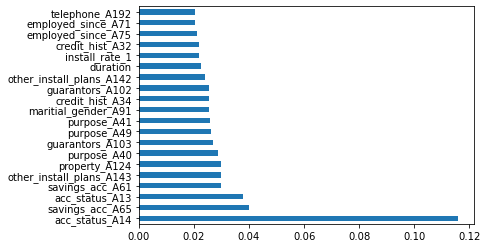

In [79]:
#Feature Selection using XGBoost
model = XGBClassifier()
xgb_fit = model.fit(new_X_train, y_train)
feature_importances = pd.Series(xgb_fit.feature_importances_ , index=new_X_train.columns)
feature_importances.nlargest(20).plot(kind='barh')

In [80]:
important = feature_importances.nlargest(25).keys()

important

Index(['acc_status_A14', 'savings_acc_A65', 'acc_status_A13',
       'savings_acc_A61', 'other_install_plans_A143', 'property_A124',
       'purpose_A40', 'guarantors_A103', 'purpose_A49', 'purpose_A41',
       'maritial_gender_A91', 'credit_hist_A34', 'guarantors_A102',
       'other_install_plans_A142', 'duration', 'install_rate_1',
       'credit_hist_A32', 'employed_since_A75', 'employed_since_A71',
       'telephone_A192', 'other_install_plans_A141', 'savings_acc_A64',
       'purpose_A46', 'credit_hist_A31', 'employed_since_A74'],
      dtype='object')

# Model Training with Selected Feature and Parameter Tuning

>After selecting the most relevant features in the dataset, the previous models need to be retraind on the new feature set with tuned parameters. GridSearchCV that uses a set of parameters as an input to chose from them that best fit the model with this dataset.

In [81]:
#New feature test/train split
selected_X = X[important]
selected_X_train, selected_X_test, y_train, y_test = train_test_split(selected_X, Y, test_size=0.2)

In [82]:
#GridSearchCV XGBoost
params = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000]
}

xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric =auc), param_grid=params, scoring = 'roc_auc', verbose=False).fit(selected_X_train,y_train)

print(xgb_model.best_estimator_)
xgb_model.score(selected_X_test,y_test)

[16:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:19:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:20:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:20:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:20:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:21:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:21:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:21:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.8219435736677118

<AxesSubplot:>

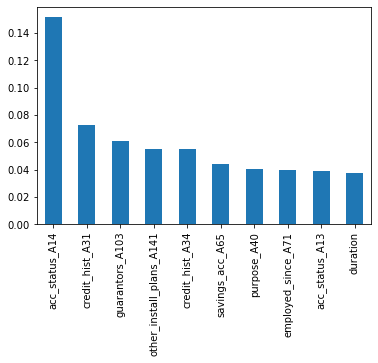

In [83]:
#XGBoost feature importance
xgb_feature_importances = pd.Series(xgb_model.best_estimator_.feature_importances_ , index=selected_X_train.columns)
xgb_feature_importances.nlargest(10).plot(kind='bar')

In [84]:
xgb_y_pred = xgb_model.predict(selected_X_test)
matrix = confusion_matrix(y_test, xgb_y_pred)
matrix

array([[128,  17],
       [ 25,  30]], dtype=int64)

In [85]:
#GridSearchCV random forest
params = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'n_estimators': [100,200,300,400,500,600,700,800,900,1000]
    
}

rfc_model = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring = 'roc_auc', verbose=False).fit(selected_X_train,y_train)


print(rfc_model.best_estimator_)
rfc_model.score(selected_X_test,y_test)

RandomForestClassifier(max_depth=6, n_estimators=700)


0.8332915360501567

<AxesSubplot:>

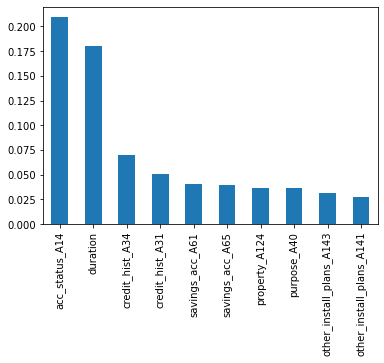

In [86]:
#Random forest feature importance
rfc_feature_importances = pd.Series(rfc_model.best_estimator_.feature_importances_ , index=selected_X_train.columns)
rfc_feature_importances.nlargest(10).plot(kind='bar')

In [87]:
rfc_y_pred = rfc_model.predict(selected_X_test)
matrix = confusion_matrix(y_test, rfc_y_pred)
matrix

array([[140,   5],
       [ 43,  12]], dtype=int64)

In [88]:
#GridSearchCV logistic regression
params = {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]
}

log_model = GridSearchCV(LogisticRegression(), param_grid=params, scoring = 'roc_auc', verbose=False).fit(selected_X_train,y_train)


print(log_model.best_estimator_)
log_model.score(selected_X_test,y_test)

LogisticRegression()


0.810846394984326

In [89]:
log_y_pred = log_model.predict(selected_X_test)
matrix = confusion_matrix(y_test, log_y_pred)
matrix

array([[130,  15],
       [ 34,  21]], dtype=int64)

In [90]:
#GridSearchCV kNN
k_range = list(range(1, 31))
params = dict(n_neighbors=k_range)

knn_model = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring = 'roc_auc', verbose=False).fit(selected_X_train,y_train)


print(knn_model.best_estimator_)
knn_model.score(selected_X_test,y_test)

KNeighborsClassifier(n_neighbors=30)


0.7841379310344828

In [91]:
knn_y_pred = knn_model.predict(selected_X_test)
matrix = confusion_matrix(y_test, knn_y_pred)
matrix

array([[138,   7],
       [ 45,  10]], dtype=int64)

In [92]:
#GridSearchCV decision tree
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]
}

dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring = 'roc_auc', verbose=False).fit(selected_X_train,y_train)


print(dt_model.best_estimator_)
dt_model.score(selected_X_test,y_test)

DecisionTreeClassifier(max_depth=4)


0.754858934169279

<AxesSubplot:>

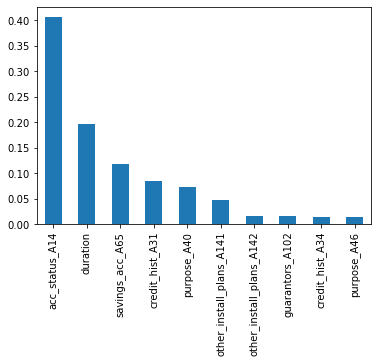

In [93]:
#Decision tree feature importance
dt_feature_importances = pd.Series(dt_model.best_estimator_.feature_importances_ , index=selected_X_train.columns)
dt_feature_importances.nlargest(10).plot(kind='bar')

In [94]:
dt_y_pred = dt_model.predict(selected_X_test)
matrix = confusion_matrix(y_test, dt_y_pred)
matrix

array([[134,  11],
       [ 39,  16]], dtype=int64)

>Naive bayes model has no parameters to be tuned so only feature selection is tested.

In [95]:
#Naive bayes with selected features
nb_model = GaussianNB()
nb_model.fit(selected_X_train,y_train)
nb_y_pred = nb_model.predict_proba(selected_X_test)
nb_y_pred1 = nb_model.predict(selected_X_test)


In [96]:
roc_auc_score(y_test, nb_y_pred[:,1])

0.742758620689655

In [97]:
matrix = confusion_matrix(y_test, nb_y_pred1)
matrix

array([[114,  31],
       [ 27,  28]], dtype=int64)

Observations:
- After feature selection and parameter tuning, all models yeilds higher score than the previous models (models without feature selection and parameter tuning).
- Random forest model yeilds the best score. Naive bayes, however, provided the lowest score.
- Random forest show the lowest count of false positives among all models while naive bays scored the highest count of false positive

# Conclusion

>Based on the results provided throughout this nootbook, it was proven that selecting important features along with tuning the paramaters provided the highest scores. Random forest should be chosen as the best classifier for this problem as it provided high score and low counts of false positives which fits the cost matrix. 